# Trend Changepoints (Điểm thay đổi xu hướng)

Bạn có thể nhận thấy trong các ví dụ trước trong tài liệu này rằng các chuỗi thời gian thực thường xuyên có những thay đổi đột ngột trong quỹ đạo của chúng. Theo mặc định, Prophet sẽ tự động phát hiện những điểm thay đổi này và sẽ cho phép trend thích ứng một cách thích hợp. Tuy nhiên, nếu bạn muốn có quyền kiểm soát tốt hơn đối với quá trình này (ví dụ: Prophet đã bỏ lỡ một thay đổi về tỷ lệ hoặc overfitting các thay đổi về tỷ lệ trong lịch sử), thì bạn có thể sử dụng một số đối số đầu vào.

## Automatic changepoint detection in Prophet (Tự động phát hiện điểm thay đổi trong Prophet)

Prophet phát hiện các điểm thay đổi bằng cách trước tiên chỉ định một số lượng lớn các điểm thay đổi tiềm năng mà tại đó tỷ lệ được phép thay đổi. Sau đó, nó đặt trước mức độ thưa thớt về mức độ thay đổi của tỷ lệ (tương đương với chuẩn hóa L1) - điều này về cơ bản có nghĩa là Prophet có một số lượng lớn các địa điểm khả thi mà tỷ lệ có thể thay đổi, nhưng sẽ sử dụng càng ít trong số chúng càng tốt. Xem xét dự báo của Peyton Manning từ Quickstart. Theo mặc định, Prophet chỉ định 25 điểm thay đổi tiềm năng được đặt thống nhất trong 80% đầu tiên của chuỗi thời gian. Các đường thẳng đứng trong hình này cho biết vị trí đặt các điểm thay đổi tiềm năng:

![25 điểm thay đổi](https://facebook.github.io/prophet/static/trend_changepoints_files/trend_changepoints_4_0.png)

Mặc dù chúng tôi có rất nhiều nơi mà tỷ lệ có thể thay đổi, nhưng do thời gian trước thưa thớt, hầu hết các điểm thay đổi này không được sử dụng. Chúng ta có thể thấy điều này bằng cách vẽ đồ thị cường độ thay đổi tốc độ tại mỗi điểm thay đổi:

![Cường độ thay đổi tại 25 điểm](https://facebook.github.io/prophet/static/trend_changepoints_files/trend_changepoints_6_0.png)

Số lượng điểm thay đổi tiềm năng có thể được đặt bằng cách sử dụng đối số `n_changepoints`, nhưng điều này được điều chỉnh tốt hơn bằng cách điều chỉnh chính quy hóa. Vị trí của các điểm thay đổi ý nghĩa có thể được hình dung bằng:

In [1]:
import pandas as pd
from prophet import Prophet

df=pd.read_csv('https://raw.githubusercontent.com/facebook/prophet/main/examples/example_wp_log_peyton_manning.csv')

m=Prophet()
m.fit(df)

future=m.make_future_dataframe(periods=365)
forecast=m.predict(future)

20:45:42 - cmdstanpy - INFO - Chain [1] start processing
20:45:42 - cmdstanpy - INFO - Chain [1] done processing


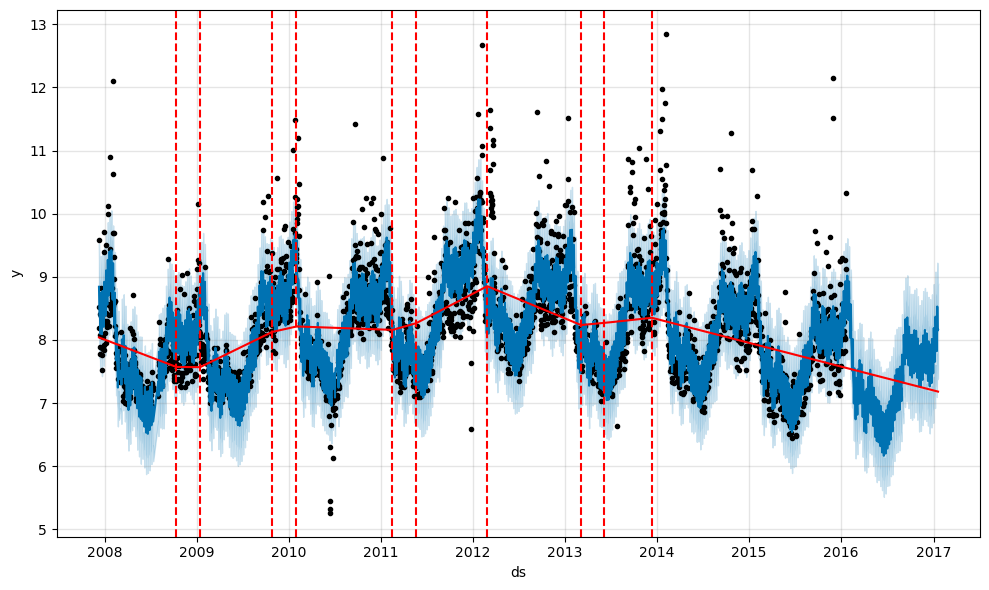

In [2]:
from prophet.plot import add_changepoints_to_plot

fig=m.plot(forecast)
a=add_changepoints_to_plot(fig.gca(), m, forecast)

Theo mặc định, các điểm thay đổi chỉ được suy ra trong 80% đầu tiên của chuỗi thời gian để có nhiều đường băng cho việc dự báo xu hướng phía trước và để tránh biến động khớp quá mức ở cuối chuỗi thời gian. Mặc định này hoạt động trong nhiều trường hợp nhưng không phải tất cả và có thể được thay đổi bằng cách sử dụng đối số `changepoint_range`. Ví dụ: `m = Prophet(changepoint_range=0.9)` trong Python hoặc `m <- Prophet(changepoint.range = 0.9)` trong R sẽ đặt các điểm thay đổi tiềm năng trong 90% đầu tiên của chuỗi thời gian.

## Adjusting trend flexibility (Điều chỉnh xu hướng linh hoạt)
Nếu xu hướng thay đổi là overfit (quá linh hoạt) hoặc underfit (không đủ tính linh hoạt), bạn có thể điều chỉnh cường độ của độ thưa thớt trước bằng cách sử dụng đối số đầu vào `changepoint_prior_scale`. Theo mặc định, tham số này được đặt thành 0,05. Tăng nó sẽ làm cho xu hướng linh hoạt hơn:

20:45:44 - cmdstanpy - INFO - Chain [1] start processing
20:45:46 - cmdstanpy - INFO - Chain [1] done processing


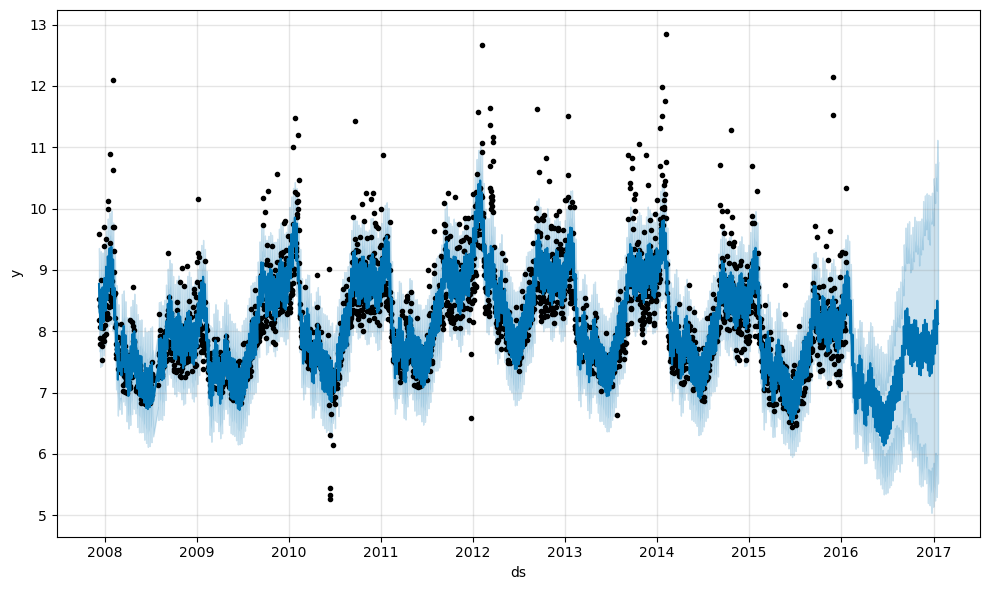

In [3]:
m=Prophet(changepoint_prior_scale=0.5)
forecast=m.fit(df).predict(future)
fig=m.plot(forecast)

Giảm sẽ làm cho xu hướng ít linh hoạt hơn

20:45:48 - cmdstanpy - INFO - Chain [1] start processing
20:45:48 - cmdstanpy - INFO - Chain [1] done processing


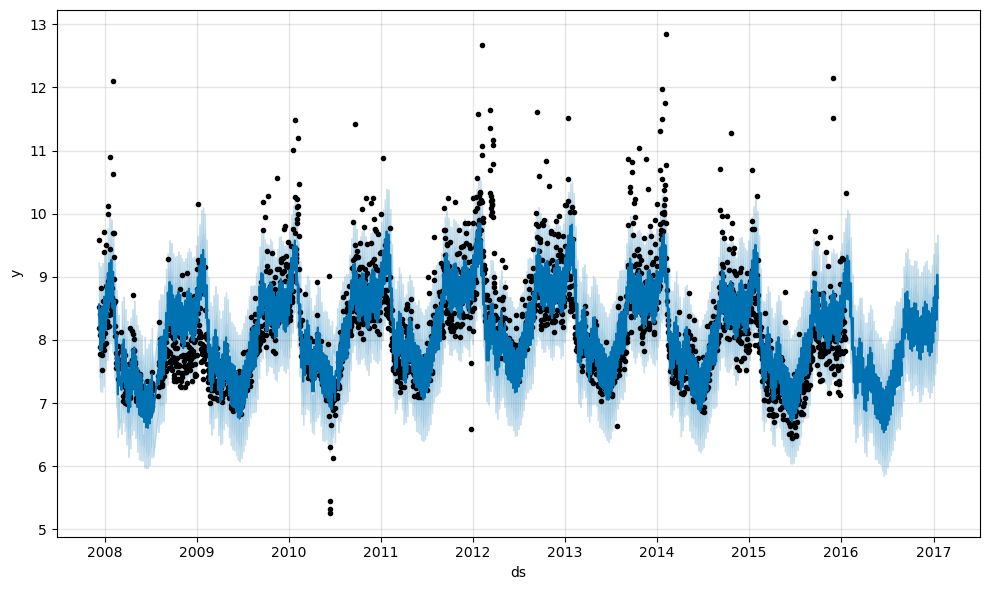

In [4]:
m=Prophet(changepoint_prior_scale=0.001)
forecast=m.fit(df).predict(future)
fig=m.plot(forecast)

Khi trực quan hóa dự báo, tham số này có thể được điều chỉnh khi cần nếu xu hướng có vẻ quá phù hợp hoặc không phù hợp. Trong cài đặt hoàn toàn tự động, hãy xem tài liệu về cross validation để biết các đề xuất về cách điều chỉnh tham số này.

## Specifying the locations of the changepoints (Chỉ định vị trí của các điểm thay đổi)

Nếu muốn, thay vì sử dụng phát hiện điểm thay đổi tự động, bạn có thể chỉ định thủ công vị trí của các điểm thay đổi tiềm năng bằng đối số `changepoints`. Sau đó, các thay đổi về độ dốc sẽ chỉ được phép tại những điểm này, với quy trình chuẩn hóa thưa thớt giống như trước đây. Chẳng hạn, người ta có thể tạo một grid các điểm như được thực hiện tự động, nhưng sau đó bổ sung lưới đó bằng một số ngày cụ thể được biết là có khả năng thay đổi. Một ví dụ khác, các điểm thay đổi có thể bị giới hạn hoàn toàn trong một nhóm ngày nhỏ, như được thực hiện ở đây: